In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [23]:
homedir = os.path.expanduser("~")
output_dir = f'{homedir}/PROCESSED_DATA'
input_dir = f'{homedir}/INPUT_DATA'

In [4]:
from viz import generate_latent_space, generate_umap_embedding
from misc import assign_color_map, get_color_map, get_clean_batch_sz

2024-07-15 15:53:20.065061: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-15 15:53:20.093389: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-15 15:53:20.093446: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-15 15:53:20.111025: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Metadata

In [27]:
os.listdir(input_dir)

['ST001422',
 'ST002112',
 'ST001931',
 'ST002244',
 'ST002773',
 'metadata.csv',
 'ST001237',
 'ST000909',
 'stanford-hmp2',
 'selection_df.csv',
 'ST001918',
 'ST001849',
 'ST002251',
 'ST002331',
 'ST001519',
 'ST001408',
 'ST001423',
 'hash.txt',
 'ST001236',
 'ST000422',
 'ST001428',
 'ST000388',
 'ST002027',
 'ST000601',
 'ST001932']

In [38]:
metadata = pd.read_csv(f'{input_dir}/metadata.csv',index_col=0)
selection_df = pd.read_csv(f'{input_dir}/selection_df.csv',index_col=0)
metadata['Set'] = selection_df['Set']

/var/tmp/ipykernel_1205462/1844025842.py:1: DtypeWarning: Columns (1,28,30,31,32,33,34,46,50,51,52,53,54,55,56,57,58) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv(f'{input_dir}/metadata.csv',index_col=0)


In [41]:
metadata['Set'].value_counts()

Set
Pretrain Discovery Train    16862
Pretrain Test                2060
Pretrain Discovery Val       1905
skip                          971
Finetune Discovery Train      443
Finetune Discovery Val        149
Finetune Test                 149
Name: count, dtype: int64

In [43]:
pretrain_metadata = metadata[metadata['Set'].str.contains('Pretrain')]

In [63]:
cohort_order = pretrain_metadata['Cohort Label v0'].value_counts().sort_index().index.tolist()

<Axes: xlabel='Count', ylabel='Study ID'>

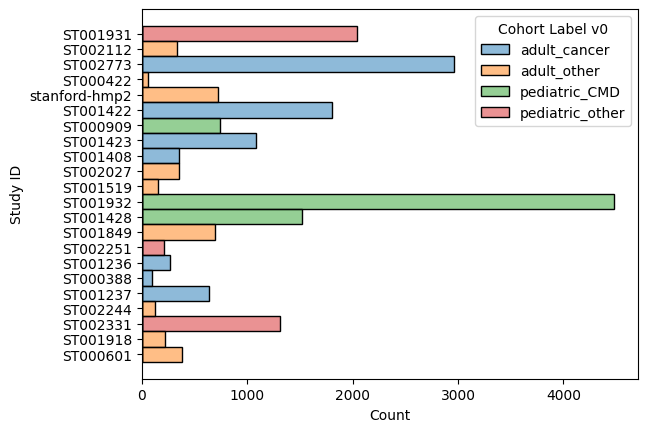

In [64]:
sns.histplot(y='Study ID', hue='Cohort Label v0', data=pretrain_metadata,hue_order=cohort_order)

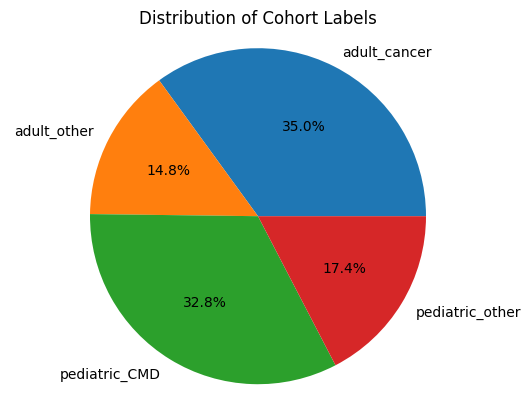

In [65]:
# pretrain_metadata['Cohort Label v0'].value_counts()
pretrain_metadata['Cohort Label v0'].value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Cohort Labels')
plt.ylabel('')
plt.show()

In [55]:
hue_order=['Pretrain Discovery Train','Pretrain Discovery Val','Pretrain Test']

<Axes: xlabel='BMI', ylabel='Count'>

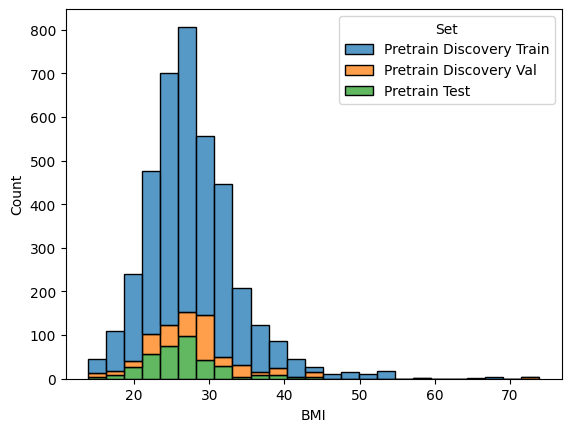

In [60]:
sns.histplot(data=pretrain_metadata,x='BMI', hue = 'Set',multiple='stack',bins=25,hue_order=hue_order)

<Axes: xlabel='Sex', ylabel='Count'>

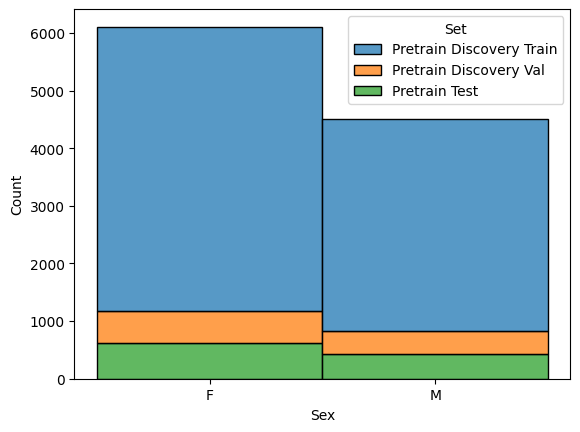

In [58]:
sns.histplot(data=pretrain_metadata,x='Sex', hue = 'Set',multiple='stack',bins=25,hue_order=hue_order)

<Axes: xlabel='Smoking Status', ylabel='Count'>

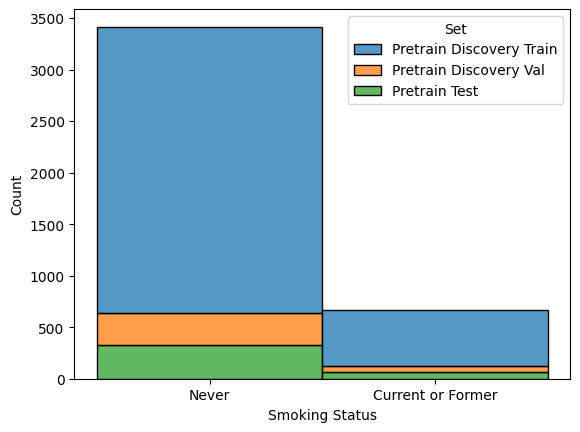

In [56]:
sns.histplot(data=pretrain_metadata,x='Smoking Status', hue = 'Set',multiple='stack',bins=25,hue_order=hue_order)

<Axes: xlabel='Cancer Risk', ylabel='Count'>

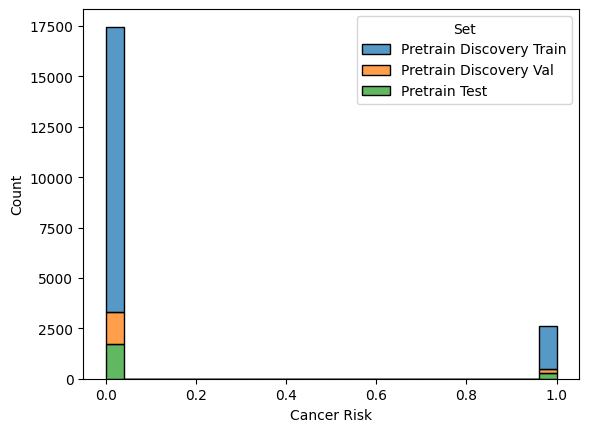

In [57]:
sns.histplot(data=pretrain_metadata,x='Cancer Risk', hue = 'Set',multiple='stack',bins=25,hue_order=hue_order)

## UMAP of the raw data

In [3]:
os.listdir(output_dir)

['y_Pretrain_Test.csv',
 'y_Finetune_Discovery_Train.csv',
 'X_Finetune_Discovery_Val.csv',
 'y_Finetune_Discovery.csv',
 'X_Pretrain_Test.csv',
 'X_Finetune_Test.csv',
 'X_Finetune_Discovery_Train.csv',
 'X_Pretrain_All.csv',
 'X_Pretrain_Discovery_Val.csv',
 'X_Finetune_Discovery.csv',
 'y_Finetune_Discovery_Val.csv',
 'X_Pretrain_Discovery_Train.csv',
 'y_Finetune_Test.csv',
 'y_Pretrain_Discovery_Train.csv',
 'y_Pretrain_Discovery_Val.csv',
 'y_Pretrain_All.csv']

In [16]:
X_data = pd.read_csv(f'{output_dir}/X_Pretrain_Discovery_Train.csv', index_col=0)
y_data = pd.read_csv(f'{output_dir}/y_Pretrain_Discovery_Train.csv', index_col=0)

/var/tmp/ipykernel_1205462/1516889822.py:2: DtypeWarning: Columns (8,13,14,16,17,20,21,22,34,35,40,41,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  y_data = pd.read_csv(f'{output_dir}/y_Pretrain_Discovery_Train.csv', index_col=0)


In [17]:
Z_umap = generate_umap_embedding(X_data)


In [18]:
Z_umap.columns = ['UMAP1', 'UMAP2']
Z_embed = Z_umap.join(y_data)

In [21]:
hue_col = 'Cohort Label v0'
eval_name = 'Discovery Train'
setup_id = 'Raw Data'

Number of samples in Discovery Train: 16636


Text(0.5, 1.0, 'Raw Data Latent Space of Discovery Train (N=16636)')

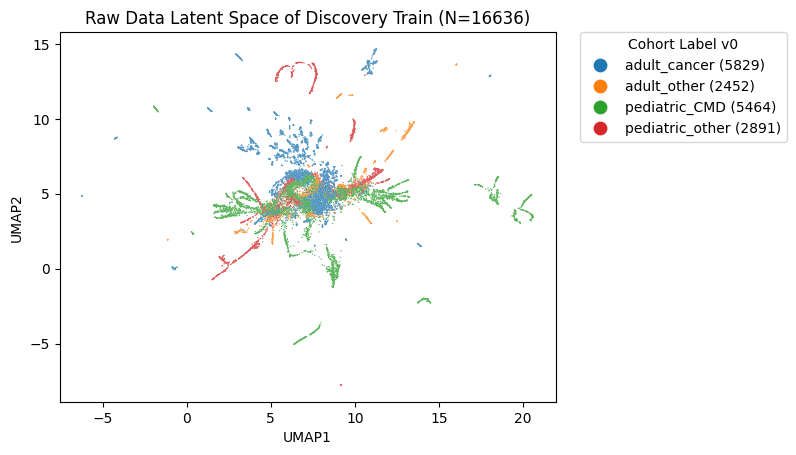

In [66]:
 # palette = get_color_map(Z_embed[hue_col].nunique())
# Get the counts for each instance of the hue column, and the corresponding colormap
Z_count_sum = (~Z_embed[hue_col].isnull()).sum()
print(f'Number of samples in {eval_name}: {Z_count_sum}')
if Z_count_sum < 10:
    print('too few to plot')


if Z_embed[hue_col].nunique() > 30:
    # if more than 30 unique values, then assume its continuous
    palette = 'flare'
    Z_counts = None
else:
    # if fewer than 30 unique values, then assume its categorical
    # palette = get_color_map(Z_embed[hue_col].nunique())
    palette = assign_color_map(Z_embed[hue_col].unique())
    Z_counts = Z_embed[hue_col].value_counts()

plot_title = f'{setup_id} Latent Space of {eval_name} (N={Z_count_sum})'
# choose the marker size based on the number of nonnan values
# marker_sz = 10/(1+np.log(Z_count_sum))
marker_sz = 100/np.sqrt(Z_count_sum)

## PCA ##
## UMAP ##
fig = sns.scatterplot(data=Z_embed, x='UMAP1', y='UMAP2', hue=hue_col, palette=palette,s=marker_sz,hue_order=cohort_order)
# place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# edit the legend to include the number of samples in each cohort
handles, labels = fig.get_legend_handles_labels()

# Add the counts to the legend if hue_col is categorical
if Z_counts is not None:
    # new_labels = [f'{label} ({Z_embed[Z_embed[hue_col]==label].shape[0]})' for label in labels]
    new_labels = []
    for label in labels:
        # new_labels.append(f'{label} ({Z_counts.loc[eval(label)]})')
        try:
            new_labels.append(f'{label} ({Z_counts.loc[label]})')
        except KeyError:
            new_labels.append(f'{label} ({Z_counts.loc[eval(label)]})')
else:
    new_labels = labels

# make the size of the markers in the handles larger
for handle in handles:
    # print(dir(handle))
    handle.set_markersize(10)
    # handle._sizes = [100]

plt.legend(handles, new_labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=hue_col)

plt.title(plot_title)